# FAKE NEWS DETECTION


## Importing Libraries

In [1]:
import string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import tokenize
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, precision_score
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

## Reading Datasets

In [2]:
fake_data = pd.read_csv("datasets/Fake.csv")
real_data = pd.read_csv("datasets/True.csv")

In [3]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
fake_data.shape

(23481, 4)

In [5]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
real_data.shape

(21417, 4)

## DATA CLEANING AND PREPARATION

### Adding a flag as FAKE and REAL - to track the records

In [7]:
fake_data['target'] = 'FAKE'
real_data['target'] = 'REAL'

In [8]:
fake_data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE


In [9]:
real_data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL


### Concatenating Data Frames

In [10]:
data = pd.concat([fake_data, real_data]).reset_index(drop = True)
data.shape

(44898, 5)

### Shuffling the Data

In [11]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [12]:
data.head(10)

,title,text,subject,date,target
0,Intelligence Officials SKEWER Trump For Polit...,The latest 2016 developments are completely un...,News,"September 8, 2016",FAKE
1,Ep #10: Patrick Henningsen LIVE – ‘Inside Esot...,Join Patrick every Wednesday at Independent Ta...,US_News,"January 19, 2017",FAKE
2,Conditions not yet in place for safe Rohingya ...,GENEVA (Reuters) - Conditions in Myanmar s nor...,worldnews,"November 24, 2017",REAL
3,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,,politics,"Dec 4, 2016",FAKE
4,Supreme Court invalidates gender inequality in...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,"June 12, 2017",REAL
5,China says it will defend interests if U.S. ha...,BEIJING (Reuters) - China will take action to ...,politicsNews,"August 15, 2017",REAL
6,New ISIS Video On Brussels Features These Tru...,Donald Trump has once again given the terroris...,News,"March 24, 2016",FAKE
7,Interviews for new FBI director to start as ea...,WASHINGTON (Reuters) - The Department of Justi...,politicsNews,"May 12, 2017",REAL
8,Trump orders review of visa program to encoura...,"KENOSHA, Wis. (Reuters) - President Donald Tru...",politicsNews,"April 18, 2017",REAL
9,LOL! Marshawn Lynch’s Mommy Comes To Her Son’s...,President Donald Trump says that the Oakland R...,left-news,"Nov 20, 2017",FAKE


### Checking for any Duplicate Data Records

In [13]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
44893    False
44894    False
44895    False
44896    False
44897    False
Length: 44898, dtype: bool

### Checking for any Empty Data records

In [14]:
data.empty

False

### Removing the DATE and TITLE attributes

In [15]:
data.drop(["date","title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,The latest 2016 developments are completely un...,News,FAKE
1,Join Patrick every Wednesday at Independent Ta...,US_News,FAKE
2,GENEVA (Reuters) - Conditions in Myanmar s nor...,worldnews,REAL
3,,politics,FAKE
4,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,REAL


### Converting the records to lower-case and removing punctuations

In [16]:
import string

data['text'] = data['text'].apply(lambda x: x.lower())

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)
data.head()

,text,subject,target
0,the latest 2016 developments are completely un...,News,FAKE
1,join patrick every wednesday at independent ta...,US_News,FAKE
2,geneva reuters conditions in myanmar s northe...,worldnews,REAL
3,,politics,FAKE
4,washington reuters the us supreme court on mo...,politicsNews,REAL


### Removing Stopwords

In [17]:
import nltk

from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head()

,text,subject,target
0,latest 2016 developments completely unpreceden...,News,FAKE
1,join patrick every wednesday independent talk ...,US_News,FAKE
2,geneva reuters conditions myanmar northern rak...,worldnews,REAL
3,,politics,FAKE
4,washington reuters us supreme court monday str...,politicsNews,REAL


## DATA STATS AND VISUALISATION

### Grouping and Visualising records as per Label

target
FAKE    23481
REAL    21417
Name: text, dtype: int64


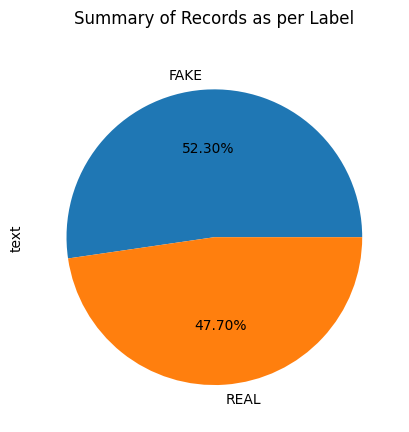

In [18]:
import os

summary = data.groupby(['target'])['text'].count()
print(summary)
summary.plot(kind="pie",autopct='%1.2f%%')
plt.title('Summary of Records as per Label\n')
#save as image
fileName = "Outputs/01_Summary_label.jpg"
if os.path.isfile(fileName):
   os.remove(fileName)
plt.savefig(fileName)
plt.show()

### Grouping and Visualising Records as per Subject

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


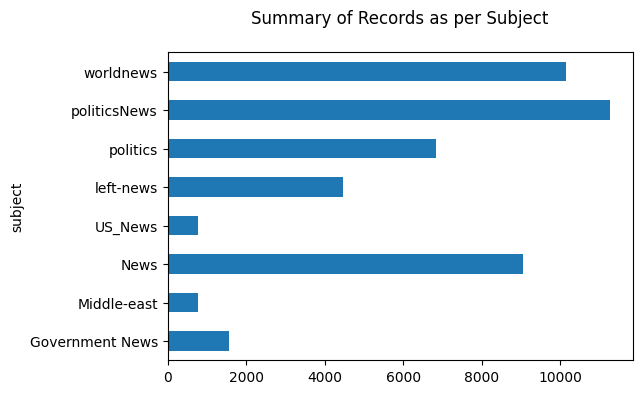

In [19]:
summary = data.groupby(['subject'])['text'].count()
print(summary)
summary.plot(kind="barh",figsize=(6,4))
plt.title('Summary of Records as per Subject\n')
fileName = "Outputs/02_Summary_subjects.jpg"
if os.path.isfile(fileName):
   os.remove(fileName)
plt.savefig(fileName)
plt.show()

### Generating WORDCLOUD for FAKE News

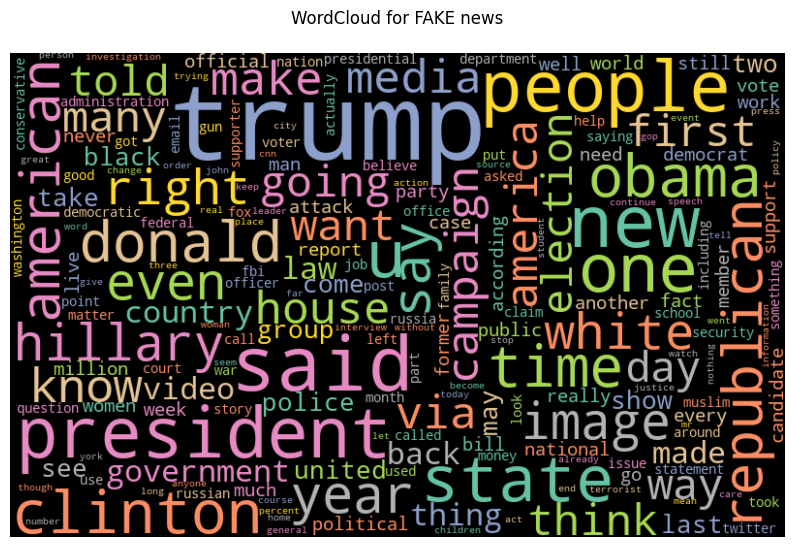

In [20]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "FAKE"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          random_state=1,
                          background_color="black",
                          colormap='Set2',
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for FAKE news\n')
fileName = "Outputs/03_WordCloud_Fake.jpg"
if os.path.isfile(fileName):
   os.remove(fileName)
plt.savefig(fileName)
plt.show()

### Generating WORDCLOUD for REAL News

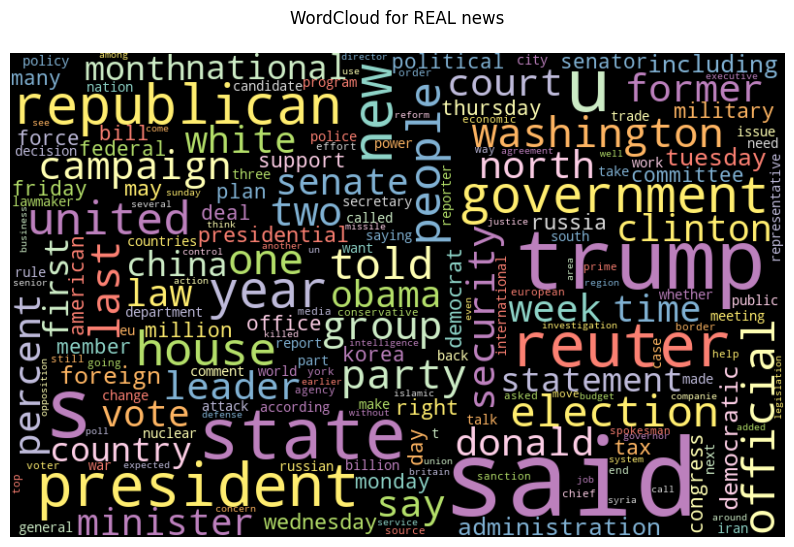

In [21]:
from wordcloud import WordCloud

real_data = data[data["target"] == "REAL"]
all_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          random_state=1,
                          background_color="black",
                          colormap='Set3',
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for REAL news\n')
fileName = "Outputs/04_WordCloud_Real.jpg"
if os.path.isfile(fileName):
   os.remove(fileName)
plt.savefig(fileName)
plt.show()

### Generating and Visualising MOST FREQUENT Words

#### Generating and Visualising MOST FREQUENT Words in FAKE News

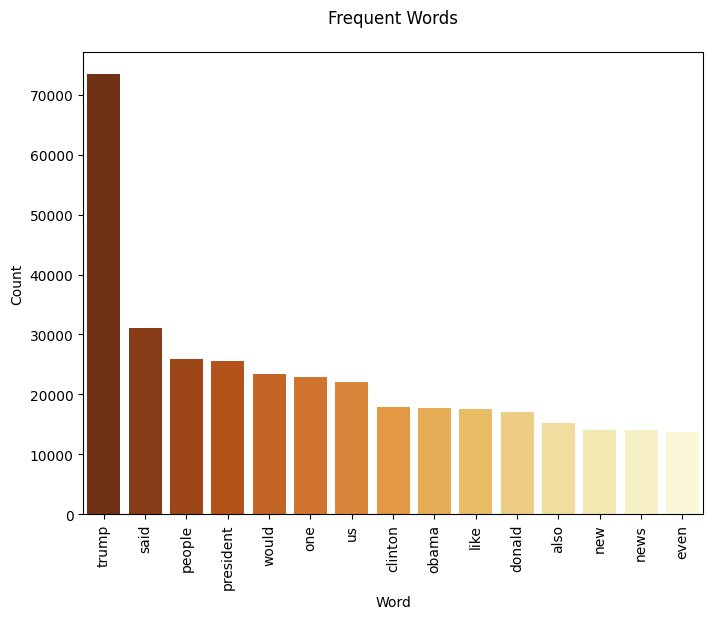

In [22]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()
    
def most_frequent_word_fake(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(8,6))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", palette = "YlOrBr_r")
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.title('Frequent Words\n')
    fileName = "Outputs/05_Frequent_Words_in_FAKE_News.jpg"
    if os.path.isfile(fileName):
       os.remove(fileName)
    plt.savefig(fileName)
    plt.show()

most_frequent_word_fake(data[data["target"] == "FAKE"], "text", 15)

#### Generating and Visualising MOST FREQUENT Words in REAL News

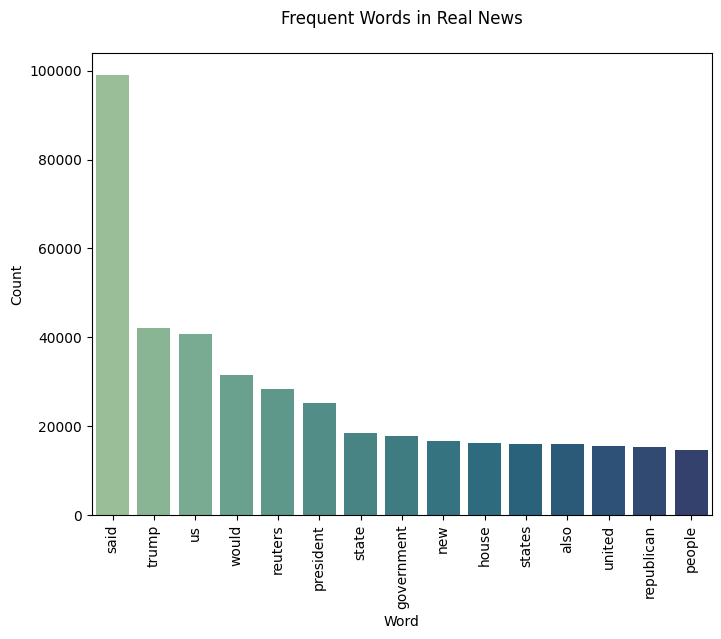

In [23]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()
    
def most_frequent_word_real(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(8,6))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", palette = "crest")
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.title('Frequent Words in Real News\n')
    fileName = "Outputs/06_Frequent_Words_in_REAL_News.jpg"
    if os.path.isfile(fileName):
       os.remove(fileName)
    plt.savefig(fileName)
    plt.show()

most_frequent_word_real(data[data["target"] == "REAL"], "text", 15)

## MODELING

### Splitting the data and Converting Texts into Vectors

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

x_train,x_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.25, random_state=42)

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### Fitting Decision Tree Classifier Model

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from datetime import datetime

#Get Current Time
now = datetime.now()
start_time_dtc = now.strftime("%H:%M:%S")

DT = DecisionTreeClassifier(max_depth=3, 
                            criterion="entropy",
                            splitter='best',
                            random_state=1)

DT.fit(xv_train, y_train)

predict_dtc = DT.predict(xv_test)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict_dtc))

# Calculate Time Elapsed
now = datetime.now()
end_time_dtc = now.strftime("%H:%M:%S")

print("Start Time =", start_time_dtc)
print("End Time =", end_time_dtc)

delta_dtc = (datetime.strptime(end_time_dtc, "%H:%M:%S") - datetime.strptime(start_time_dtc, "%H:%M:%S")).total_seconds()

print(f"Time difference is {delta_dtc} seconds")

              precision    recall  f1-score   support

        FAKE       1.00      0.99      1.00      5803
        REAL       0.99      1.00      1.00      5422

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

Start Time = 02:57:47
End Time = 02:58:01
Time difference is 14.0 seconds


#### Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix

cm_dtc = confusion_matrix(y_test, predict_dtc)

print(cm_dtc)

[[5756   47]
 [   6 5416]]


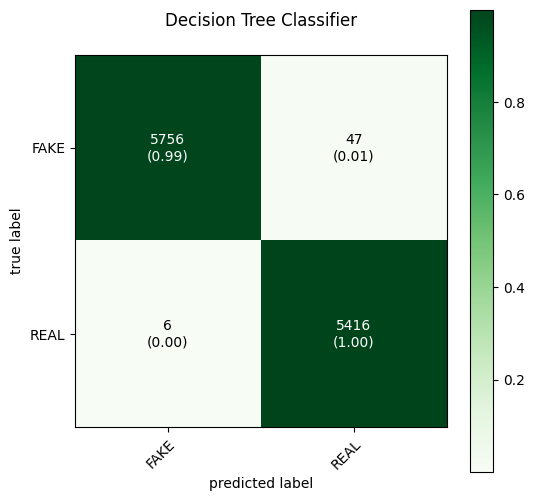

In [28]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_mat=cm_dtc, show_absolute=True,
                      show_normed=True,
                      cmap=plt.cm.Greens,
                      colorbar=True, class_names=['FAKE', 'REAL'], figsize=(6, 6))

plt.title('Decision Tree Classifier\n')
fileName = "Outputs/07_Decision_Tree_Classifier_Confusion_Matrix.jpg"
if os.path.isfile(fileName):
    os.remove(fileName)
plt.savefig(fileName)
plt.show()

#### Accuracy of the Decision Tree Classifier

In [29]:
from sklearn import metrics

accuracy_dtc = round(accuracy_score(y_test, predict_dtc)*100,2)

print("Accuracy: {}%".format(accuracy_dtc))

Accuracy: 99.53%


#### Precision of the Decision Tree Classifier

In [30]:
from sklearn import metrics
import numpy as np

precision_dtc =  np.around(metrics.precision_score(y_test, predict_dtc, average=None)*100,2)

print('Non-averaged precision score: {}%'.format(precision_dtc))

Non-averaged precision score: [99.9  99.14]%


#### Sensitivity(Recall) of the Decision Tree Classifier

In [31]:
from sklearn import metrics
import numpy as np

Sensitivity_recall_dtc = np.around(metrics.recall_score(y_test, predict_dtc,average=None)*100,2)

print('Non-averaged Sensitivity score: {}%'.format(Sensitivity_recall_dtc))

Non-averaged Sensitivity score: [99.19 99.89]%


#### F1-Score of the Decision Tree Classifier

In [32]:
from sklearn import metrics
import numpy as np

f1_score_dtc = np.around(metrics.f1_score(y_test, predict_dtc,average=None)*100,2)

print('Non-averaged F1-Score: {}%'.format(f1_score_dtc))

Non-averaged F1-Score: [99.54 99.51]%


### Fitting Random Forest Classifier Model

In [33]:
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime

#Get Current time
now = datetime.now()
start_time_rfc = now.strftime("%H:%M:%S")

RFC = RandomForestClassifier(max_depth=2, 
                             random_state=0)

RFC.fit(xv_train, y_train)

predict_rfc = RFC.predict(xv_test)

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict_rfc))

# Calculate Time Elapsed
now = datetime.now()
end_time_rfc = now.strftime("%H:%M:%S")

print("Start Time =", start_time_rfc)
print("End Time =", end_time_rfc)

delta_rfc = (datetime.strptime(end_time_rfc, "%H:%M:%S") - datetime.strptime(start_time_rfc, "%H:%M:%S")).total_seconds()

print(f"Time difference is {delta_rfc} seconds")

              precision    recall  f1-score   support

        FAKE       0.69      1.00      0.82      5803
        REAL       1.00      0.53      0.69      5422

    accuracy                           0.77     11225
   macro avg       0.85      0.76      0.75     11225
weighted avg       0.84      0.77      0.76     11225

Start Time = 02:58:03
End Time = 02:58:09
Time difference is 6.0 seconds


#### Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix

cm_rfc = confusion_matrix(y_test, predict_rfc)

print(cm_rfc)

[[5796    7]
 [2561 2861]]


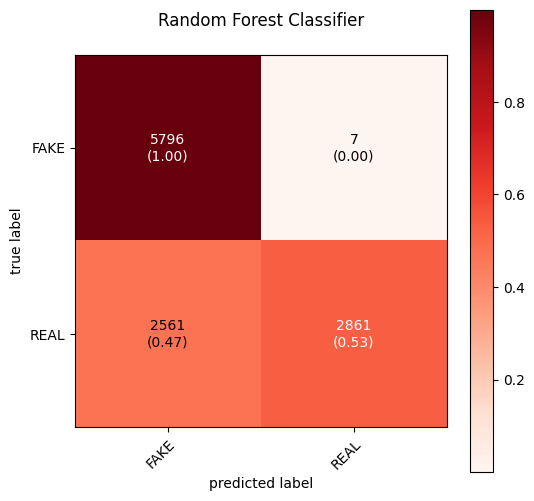

In [36]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_mat=cm_rfc, show_absolute=True,
                      show_normed=True,
                      cmap=plt.cm.Reds,
                      colorbar=True, class_names=['FAKE', 'REAL'], figsize=(6, 6))

plt.title('Random Forest Classifier\n')
fileName = "Outputs/08_Random_Forest_Classifier_Confusion_Matrix.jpg"
if os.path.isfile(fileName):
    os.remove(fileName)
plt.savefig(fileName)
plt.show()

#### Accuracy of the Random Forest Classifier

In [37]:
from sklearn import metrics

accuracy_rfc = round(accuracy_score(y_test, predict_rfc)*100,2)

print("Accuracy: {}%".format(accuracy_rfc))

Accuracy: 77.12%


#### Precision of the Random Forest Classifier

In [38]:
from sklearn import metrics
import numpy as np

precision_rfc =  np.around(metrics.precision_score(y_test, predict_rfc, average=None)*100,2)

print('Non-averaged precision score: {}%'.format(precision_rfc))

Non-averaged precision score: [69.36 99.76]%


#### Sensitivity(Recall) of the Random Forest Classifier

In [39]:
from sklearn import metrics
import numpy as np

Sensitivity_recall_rfc = np.around(metrics.recall_score(y_test, predict_rfc,average=None)*100,2)

print('Non-averaged Sensitivity score: {}%'.format(Sensitivity_recall_rfc))

Non-averaged Sensitivity score: [99.88 52.77]%


#### F1-Score of the Random Forest Classifier

In [40]:
from sklearn import metrics
import numpy as np

f1_score_rfc = np.around(metrics.f1_score(y_test, predict_rfc,average=None)*100,2)

print('Non-averaged F1-Score: {}%'.format(f1_score_rfc))

Non-averaged F1-Score: [81.86 69.02]%


### Fitting Logistic Regression Model

In [41]:
from sklearn.linear_model import LogisticRegression
from datetime import datetime

#Get Current time
now = datetime.now()
start_time_lr = now.strftime("%H:%M:%S")

LR = LogisticRegression()
LR.fit(xv_train,y_train)

predict_lr=LR.predict(xv_test)

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict_lr))

# Calculate Time Elapsed
now = datetime.now()
end_time_lr = now.strftime("%H:%M:%S")

print("Start Time =", start_time_lr)
print("End Time =", end_time_lr)

delta_lr = (datetime.strptime(end_time_lr, "%H:%M:%S") - datetime.strptime(start_time_lr, "%H:%M:%S")).total_seconds()

print(f"Time difference is {delta_lr} seconds")

              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      5803
        REAL       0.99      0.99      0.99      5422

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

Start Time = 02:58:10
End Time = 02:58:15
Time difference is 5.0 seconds


#### Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, predict_lr)

print(cm_lr)

[[5739   64]
 [  42 5380]]


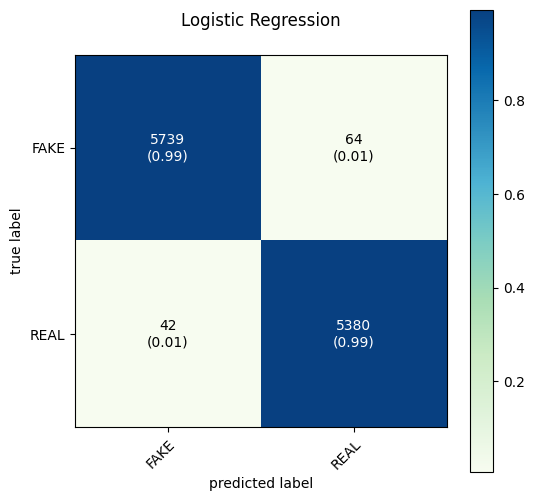

In [44]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_mat=cm_lr, show_absolute=True,
                      show_normed=True,
                      cmap=plt.cm.GnBu,
                      colorbar=True, class_names=['FAKE', 'REAL'], figsize=(6, 6))

plt.title('Logistic Regression\n')
fileName = "Outputs/09_Logistic_Regression_Confusion_Matrix.jpg"
if os.path.isfile(fileName):
    os.remove(fileName)
plt.savefig(fileName)
plt.show()

#### Accuracy of the Logistic Regression

In [45]:
from sklearn import metrics

accuracy_lr = round(accuracy_score(y_test, predict_lr)*100,2)

print("Accuracy: {}%".format(accuracy_lr))

Accuracy: 99.06%


#### Precision of the Logistic Regression

In [46]:
from sklearn import metrics
import numpy as np

precision_lr =  np.around(metrics.precision_score(y_test, predict_lr, average=None)*100,2)

print('Non-averaged precision score: {}%'.format(precision_lr))

Non-averaged precision score: [99.27 98.82]%


#### Sensitivity(recall) of the Logistic Regression

In [47]:
from sklearn import metrics
import numpy as np

Sensitivity_recall_lr = np.around(metrics.recall_score(y_test, predict_lr,average=None)*100,2)

print('Non-averaged Sensitivity score: {}%'.format(Sensitivity_recall_lr))

Non-averaged Sensitivity score: [98.9  99.23]%


#### F1-Score of the Logistic Regression

In [48]:
from sklearn import metrics
import numpy as np

f1_score_lr = np.around(metrics.f1_score(y_test, predict_lr,average=None)*100,2)

print('Non-averaged F1-Score: {}%'.format(f1_score_lr))

Non-averaged F1-Score: [99.08 99.02]%


### Fitting Gradient Boosting Classifier Model

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from datetime import datetime

#Get Current time
now = datetime.now()
start_time_gbc = now.strftime("%H:%M:%S")

GBC = GradientBoostingClassifier(n_estimators=20,
                                 max_depth=2,
                                 random_state=0)
GBC.fit(xv_train, y_train)

predict_gbc = GBC.predict(xv_test)

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict_gbc))

# Calculate Time Elapsed
now = datetime.now()
end_time_gbc = now.strftime("%H:%M:%S")

print("Start Time =", start_time_gbc)
print("End Time =", end_time_gbc)

delta_gbc = (datetime.strptime(end_time_gbc, "%H:%M:%S") - datetime.strptime(start_time_gbc, "%H:%M:%S")).total_seconds()

print(f"Time difference is {delta_gbc} seconds")

              precision    recall  f1-score   support

        FAKE       1.00      0.99      0.99      5803
        REAL       0.99      1.00      0.99      5422

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

Start Time = 02:58:17
End Time = 03:01:33
Time difference is 196.0 seconds


#### Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix

cm_gbc = confusion_matrix(y_test, predict_gbc)

print(cm_gbc)

[[5752   51]
 [   9 5413]]


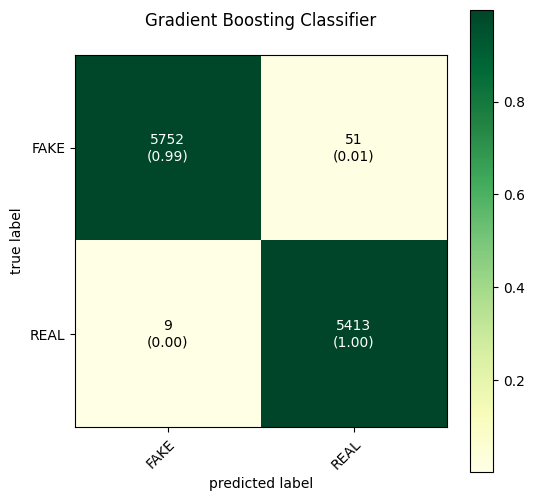

In [52]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_mat=cm_gbc, show_absolute=True,
                      show_normed=True,
                      cmap=plt.cm.YlGn,
                      colorbar=True, class_names=['FAKE', 'REAL'], figsize=(6, 6))

plt.title('Gradient Boosting Classifier\n')
fileName = "Outputs/10_Gradient_Boosting_Classifier_Confusion_Matrix.jpg"
if os.path.isfile(fileName):
    os.remove(fileName)
plt.savefig(fileName)
plt.show()

#### Accuracy of the Gradient Boosting Classifier

In [53]:
from sklearn import metrics

accuracy_gbc = round(accuracy_score(y_test, predict_gbc)*100,2)

print("Accuracy: {}%".format(accuracy_gbc))

Accuracy: 99.47%


#### Precision of the Gradient Boosting Classifier

In [54]:
from sklearn import metrics
import numpy as np

precision_gbc =  np.around(metrics.precision_score(y_test, predict_gbc, average=None)*100,2)

print('Non-averaged precision score: {}%'.format(precision_gbc))

Non-averaged precision score: [99.84 99.07]%


#### Sensitivity(Recall) of the Gradient Boosting Classifier

In [55]:
from sklearn import metrics
import numpy as np

Sensitivity_recall_gbc = np.around(metrics.recall_score(y_test, predict_gbc,average=None)*100,2)

print('Non-averaged Sensitivity score: {}%'.format(Sensitivity_recall_gbc))

Non-averaged Sensitivity score: [99.12 99.83]%


#### F1-Score of the Gradient Boosting Classifier

In [56]:
from sklearn import metrics
import numpy as np

f1_score_gbc = np.around(metrics.f1_score(y_test, predict_gbc,average=None)*100,2)

print('Non-averaged F1-Score: {}%'.format(f1_score_gbc))

Non-averaged F1-Score: [99.48 99.45]%


### Comparing Results From All the Model

In [61]:
import pandas as pd
import warnings
from tabulate import tabulate

# List of Machine Learning Models and their respective metrics
models = ['Decision_Tree', 'Random_Forest', 'Logistic_Regression', 'Gradient_Boosting']

metrics = {
    'Accuracy': [accuracy_dtc, accuracy_rfc, accuracy_lr, accuracy_gbc],
    'Performance': [delta_dtc, delta_rfc, delta_lr, delta_gbc],
    'Precision': [precision_dtc, precision_rfc, precision_lr, precision_gbc],
    'Sensitivity(Recall)': [Sensitivity_recall_dtc, Sensitivity_recall_rfc, Sensitivity_recall_lr, Sensitivity_recall_gbc],
    'F1-Score': [f1_score_dtc, f1_score_rfc, f1_score_lr, f1_score_gbc]
}

# Create a DataFrame using the metrics
data = {'Model': models}
data.update(metrics)
compare_df = pd.DataFrame.from_dict(data, orient='index')

# Print the comparison table using tabulate
table_str = tabulate(compare_df, headers='firstrow', tablefmt='pretty')

print(table_str)

with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    print('x' in np.arange(2))

+---------------------+---------------+---------------+---------------------+-------------------+
|        Model        | Decision_Tree | Random_Forest | Logistic_Regression | Gradient_Boosting |
+---------------------+---------------+---------------+---------------------+-------------------+
|      Accuracy       |     99.53     |     77.12     |        99.06        |       99.47       |
|     Performance     |     14.0      |      6.0      |         5.0         |       196.0       |
|      Precision      | [99.9  99.14] | [69.36 99.76] |    [99.27 98.82]    |   [99.84 99.07]   |
| Sensitivity(Recall) | [99.19 99.89] | [99.88 52.77] |    [98.9  99.23]    |   [99.12 99.83]   |
|      F1-Score       | [99.54 99.51] | [81.86 69.02] |    [99.08 99.02]    |   [99.48 99.45]   |
+---------------------+---------------+---------------+---------------------+-------------------+
False


### Plots Results From All the Model

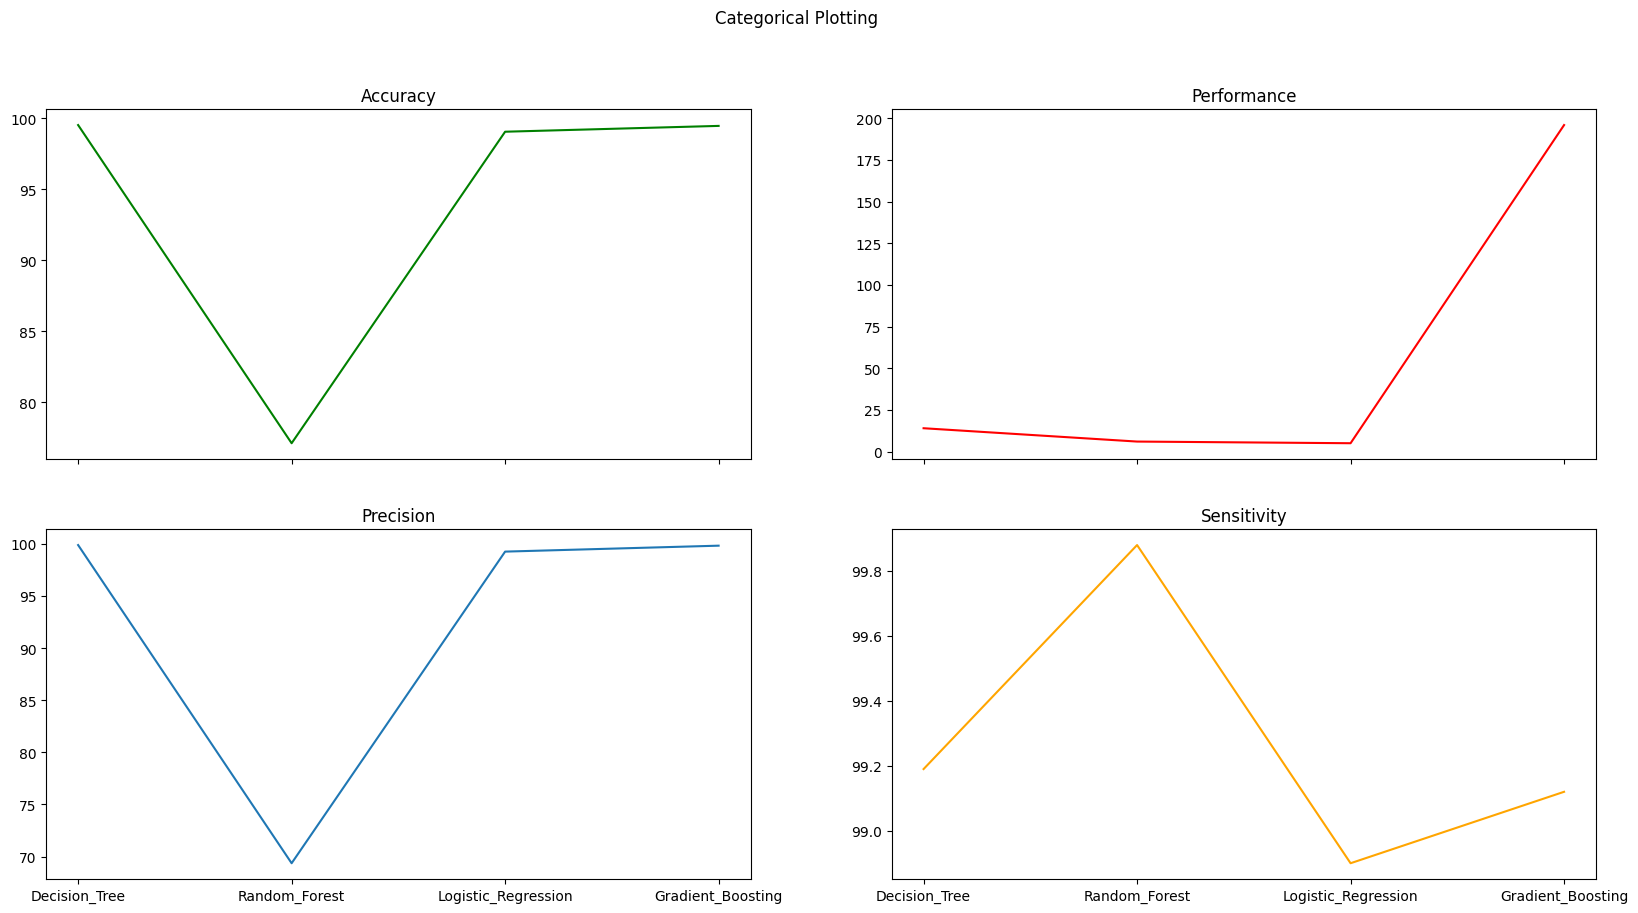

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of Machine Learning Models and their respective metrics
Models = ['Decision_Tree', 'Random_Forest', 'Logistic_Regression', 'Gradient_Boosting']

# List of results of each metric as per metric
Accuracy = [accuracy_dtc, accuracy_rfc, accuracy_lr, accuracy_gbc]
Performance = [delta_dtc, delta_rfc, delta_lr, delta_gbc] 
Precision = [precision_dtc[0], precision_rfc[0], precision_lr[0], precision_gbc[0]]
Sensitivity = [Sensitivity_recall_dtc[0], Sensitivity_recall_rfc[0], Sensitivity_recall_lr[0], Sensitivity_recall_gbc[0] ]

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(20, 10))
# Remove vertical space between axes
#fig.subplots_adjust(hspace=0)

# Plot each graph
ax[0,0].plot(models, Accuracy, color='green')
ax[0,0].set_title('Accuracy')

ax[0,1].plot(models, Performance, color='red')
ax[0,1].set_title('Performance')

ax[1,0].plot(models, Precision)
ax[1,0].set_title('Precision')

ax[1,1].plot(models, Sensitivity, color='orange')
ax[1,1].set_title('Sensitivity')

fig.suptitle('Categorical Plotting')

fileName = "Outputs/11_Categorical_Plotting.jpg"
if os.path.isfile(fileName):
   os.remove(fileName)
plt.savefig(fileName)